In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [2]:
df1=pd.read_csv("Country-data.csv",index_col=0)

In [3]:
df2=pd.read_csv("data-dictionary.csv")
pd.set_option("display.max_columns",None)

In [4]:
df1


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [5]:

pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows",None)

In [6]:
df2

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [7]:
sc=MinMaxScaler((0,1))

In [8]:
df1.isnull().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [9]:
df=sc.fit_transform(df1)

In [10]:
kmeans=KMeans()
ssd=[]
K=range(1,30)

In [11]:
for k in K:
    kmeans=KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

C:\Users\Kerem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


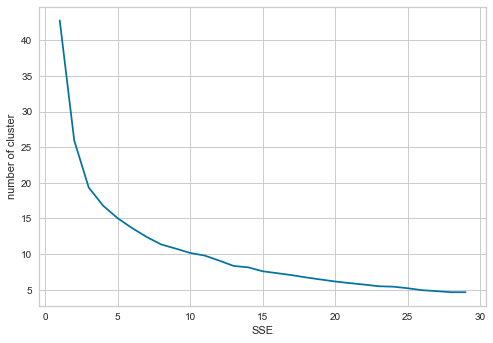

In [12]:
plt.plot(K,ssd,"bx-")
plt.xlabel("SSE")
plt.ylabel("number of cluster")
plt.show()

In [13]:
np.shape(ssd)

(29,)

In [14]:
np.shape(K)

(29,)

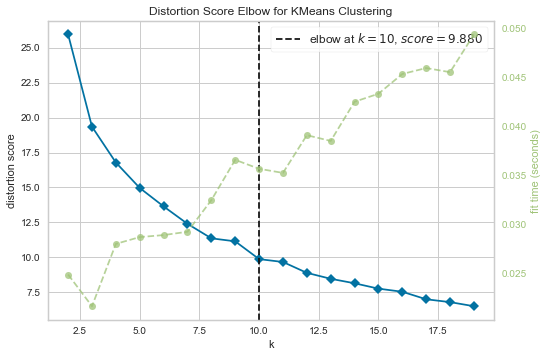

In [15]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show();

In [16]:
elbow.elbow_value_

10

In [17]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [18]:
kmeans.labels_

array([3, 6, 5, 8, 6, 5, 5, 4, 4, 5, 6, 0, 5, 6, 6, 4, 9, 8, 9, 9, 6, 9,
       5, 0, 6, 8, 3, 9, 8, 4, 9, 8, 8, 6, 5, 5, 1, 8, 1, 6, 8, 6, 6, 6,
       4, 5, 5, 5, 5, 8, 1, 6, 9, 4, 4, 1, 1, 6, 4, 1, 4, 5, 9, 8, 3, 9,
       8, 6, 4, 5, 5, 5, 9, 4, 4, 4, 5, 4, 9, 5, 1, 3, 0, 9, 1, 6, 6, 3,
       3, 5, 6, 2, 6, 1, 8, 6, 6, 8, 2, 1, 6, 3, 6, 9, 6, 5, 8, 5, 9, 5,
       4, 4, 8, 7, 4, 0, 1, 6, 9, 5, 9, 6, 4, 0, 5, 5, 3, 9, 0, 1, 6, 6,
       3, 2, 6, 6, 9, 9, 6, 4, 5, 5, 1, 5, 4, 4, 9, 1, 6, 3, 3, 9, 6, 5,
       9, 3, 6, 0, 4, 4, 5, 5, 9, 5, 6, 1, 8])

In [19]:
cluster_kmeans=kmeans.labels_

In [20]:
df=pd.read_csv("Country-data.csv",index_col=0)

In [21]:
df["Clusters"]=cluster_kmeans

In [22]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,3
Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,6
Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,5
Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,8
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,6
Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,5
Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,5
Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,4
Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,4


In [23]:
cluster5=df[df["Clusters"]==5].index

In [24]:
pd.DataFrame(cluster5)

,country
0,Algeria
1,Argentina
2,Armenia
3,Azerbaijan
4,Bangladesh
5,Brazil
6,China
7,Colombia
8,Dominican Republic
9,Ecuador


In [25]:
df.sort_values("Clusters")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Saudi Arabia,15.7,49.600,4.29,33.0000,45400,17.200,75.1,2.96,19300,0
Qatar,9.0,62.300,1.81,23.8000,125000,6.980,79.5,2.07,70300,0
Oman,11.7,65.700,2.77,41.2000,45300,15.600,76.1,2.90,19300,0
United Arab Emirates,8.6,77.700,3.66,63.6000,57600,12.500,76.5,1.87,35000,0
Brunei,10.5,67.400,2.84,28.0000,80600,16.700,77.1,1.84,35300,0
Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,0
Kuwait,10.8,66.700,2.63,30.4000,75200,11.200,78.2,2.21,38500,0
"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740,1
Tanzania,71.9,18.700,6.01,29.1000,2090,9.250,59.3,5.43,702,1
